# ***Welcome to this Jupyter notebook where we will show and explain how does the code work and what did we do to get such information and rational behind it. Also, show as guide for newcomers as well.***

# 1. **Library: Right Tool for Right Use**
*   Library is like set of toolboxes done by other and can be called or bring to life by using "import yourLibrary"
*   The library that we import below is essential for making data easy to "tamper" as improve the data ready for training, since our data isn't clean or not ready due to imperfections.

## What library did we import?
  First 2 will be for Data handling (To play around with data), 1 is for visualization, and another for Machine Learning as follows:
  1. Pandas - the always go to tool for data scientist, this will be for import, visualize the table like excel, and this will also show the structure of the dataset we got.

  2. numpy - Shorten from Numerical Python, another essential for scientific computing. This is for showing the arrays and matrices that is multidimentional which is easy to compute for this task.

  3. Scipy - Shorten from Science Python, more technical than numpy, it's a tool that is meant to work along with Numpy for more easier tool for doing this kind of data where we need to remove outliers as example.

  4. Matplotlib & Seaborn - This is for graphing and to visualize the data in more easier to read format like line graph or bar graph.

  5. sklearn - Scikit Learn, this is where we will train and showcase our data to represent the data with


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library Import
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# This is set styles to visual it better
sns.set_style('whitegrid')
#print(plt.style.available) This is for printing style of the graph available to choose from
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully!")

Libraries imported successfully!


# 2. **Datasets: Import and Inspection**

Next step is to import the dataset that we will be use for training and see what we need to aware when we need to process to make it clean and ready for AI to train on.

df also refer as DataFrame is what we used for labeled dataset and we will refer this dataset we train on as **"df"**
We also print information to see what we dealing with by doing df.head() -> which will display first 5 row when typed down as following:

In [ ]:
df = pd.read_csv('laptopData.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Next, we will display the information of this df to see what kind of data is stored in each column, the actual amount of data in the column which includes the MCAR or Missing Completely at Random and the general information of this df

In [ ]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


Now, we can tell that there's **Actually** 1273 instances that is recorded properly, instead of 1303 instances we intially think. We also know that there's type of data we need to deal with and also change the type to be more appropriate to represent with, we will do such steps on Data Cleaning

# 3. **Dataset: Clean for AI and preprocess**

This step is most crucial for doing this kind of dataset, as we mentioned in the documents, our data is ***NEVER*** perfect hence why we need to polish and clean to able to be AI-Ready. We will clean each feature step by step.

## 3.1 **Dataset Clean: Dropping the Unnammed column**

This usually isn't the main issue. However, this isn't necessary because Pandas already have id number and won't be used for training as column anyways

In [ ]:
if "Unnamed: 0" in df.columns:
  df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Now, we can see that the column are disappear from the initial because we drop the column "Unnamed: 0" and implement the change immediately. Let's go to next step for the the MCAR and MAR.

## 3.2 **Dataset Clean: Missing Random and Completely Random**

As title say this is purely about dropping the column with no values for entire row or fill in the missing value.

Why? - There's many reason why we need to implement this:

1. the data can be skewed with the means, median, and mode for this dataset.
2. it can cause error to the program as well

Hence why we need to deal with this issues.



### 3.2.1 **Handle with MCAR**

Handle with MCAR or Missing Completely at Random can be deal with simplest way which is removing entire row/instances of that data.

We will first print out the missing value first to see how many are there at first

In [ ]:
print("\n--- Initial count of missing values per column ---")
print(df.isnull().sum())


--- Initial count of missing values per column ---
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


Then, we will implement the changes as follows.

*Note: Term dataframe here is refering to dataset.*

In [ ]:
print(f"Shape of dataframe before dropping empty rows: {df.shape}")
df.dropna(how='all', inplace=True) # This removes the empty rows
print(f"Shape of dataframe after dropping empty rows: {df.shape}")
print("Empty rows have been removed!")

Shape of dataframe before dropping empty rows: (1303, 11)
Shape of dataframe after dropping empty rows: (1273, 11)
Empty rows have been removed!


So the code above is for handling the missing values and we show the difference for before and after. We did same technique as before where now the row that has no data disappear. We now have technically remove ***"all missing value"*** but there's one more type we need to address.

### 3.2.2 **Handle with MAR**

Now, the next one is MAR. This is more harder to detect where in dataset the missing at random data will show in plain sight sometimes but will annotate as "?/,/." we have to remove this because this **WILL** cause error to the program for not being integer (Full number) or float point value (Numbers with Decimal) or skewed the counting for like company as example. Here's how we handle the MAR.

In [ ]:
# We will iterate through entire column to check the string
for col in df.columns:
  # This will go through every column to see if there's missing values that indicates by "? . ,"
  if df[col].dtype == 'object':
    if df[col].str.contains("\?", na=False).any():
      print(f"Found '?' in column '{col}'")
    elif df[col].str.contains("\.", na=False).any():
      print(f"Found '.' in column '{col}'")
    elif df[col].str.contains("\,", na=False).any():
      print(f"Found ',' in column '{col}'")
    else:
      print(f"No '?', ',' or '.' found in column '{col}'")

No '?', ',' or '.' found in column 'Company'
No '?', ',' or '.' found in column 'TypeName'
Found '?' in column 'Inches'
No '?', ',' or '.' found in column 'ScreenResolution'
Found '.' in column 'Cpu'
No '?', ',' or '.' found in column 'Ram'
Found '?' in column 'Memory'
No '?', ',' or '.' found in column 'Gpu'
No '?', ',' or '.' found in column 'OpSys'
Found '?' in column 'Weight'


<>:5: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\,'
<>:5: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipython-input-1714676190.py:5: SyntaxWarning: invalid escape sequence '\?'
  if df[col].str.contains("\?", na=False).any():
/tmp/ipython-input-1714676190.py:7: SyntaxWarning: invalid escape sequence '\.'
  elif df[col].str.contains("\.", na=False).any():
/tmp/ipython-input-1714676190.py:9: SyntaxWarning: invalid escape sequence '\,'
  elif df[col].str.contains("\,", na=False).any():


Here we can see that we only have MAR on Inches, Memory, and Weight. Now, you may wonder why CPU column is affected here. This is because of CPU section have "." in the clock speed and we are checking any string containing dot so that's why it's showing. We know we only need to fix MAR in those 3 columns with "?". We will start replacing those with numbers and texts to be used for next step.


In [ ]:
#Replacing data with Numpy NaN to easily replace it.
for col in df.columns:
  if df[col].dtype == 'object':
    if df[col].str.contains("\?", na=False).any():
      print(f"Found '?' in column '{col}', Replacing with usable data")
      # First we replace "?" with Not a Number to be filled
      df[col] = df[col].replace("?", np.nan)


# Imputation Starts Here, First is Mean imputation on Inches Column
if df['Inches'].isnull().sum() > 0:
  # Converting the column to numeric before calculating the mean
  df['Inches'] = pd.to_numeric(df['Inches'])
  mean_inches = df['Inches'].mean() # Find Mean
  df.loc[df['Inches'].isnull(), 'Inches'] = mean_inches
  print(f"The 'Inches' column has fill with values using the mean ({mean_inches:.2f}).")

# Next is Weight Column, here we use Mode imputation
if df['Weight'].isnull().sum() > 0:
  mode_weight = df['Weight'].mode()[0] # Find mode of the weight
  df.loc[df['Weight'].isnull(), 'Weight'] = mode_weight
  print(f"The 'Mode' column has filled with values using the mode ({mode_weight}).")

# Last one is Memory, also using Mode imputation
if df['Memory'].isnull().sum() > 0:
  mode_memory = df['Memory'].mode()[0] # Find mode of the Memory
  df.loc[df['Memory'].isnull(), 'Memory'] = mode_memory
  print(f"The 'Memory' column has filled with values using the mode ({mode_memory}).")

Found '?' in column 'Inches', Replacing with usable data
Found '?' in column 'Memory', Replacing with usable data
Found '?' in column 'Weight', Replacing with usable data
The 'Inches' column has fill with values using the mean (15.13).
The 'Mode' column has filled with values using the mode (2.2kg).
The 'Memory' column has filled with values using the mode (256GB SSD).


<>:4: SyntaxWarning: invalid escape sequence '\?'
<>:4: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipython-input-3838409351.py:4: SyntaxWarning: invalid escape sequence '\?'
  if df[col].str.contains("\?", na=False).any():


With Code above, we have show sonme methods that we can use to imputate the data. Here's all method that can be use.

1. **Mean Imputation** - Impute with average number of that column
2. **Median Imputation** - Impute with the middle number of the data
3. **Mode Imputation** - Impute with the most frequent Number OR Text (The Text Compatible Method)

## 3.3 **Dataset Clean + Preprocessing: Complexity and Parsing down**

Complexity can describe to the item that contains too much data, and it can be reduce and dissect to different column. This will lower and also make it easier to read and makes it easier to compute.

Let's deal with CPU first since it's simplest one to fix.

In [ ]:
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Cpu_Speed_GHz'] = df['Cpu'].apply(lambda x: float(x.split()[-1].replace('GHz', '')))

Now, what this does is we split to grab the information. Let's show the example as 'Intel Core i5 2.3GHz' This can dissect down to 4 different part. However, there's only 2 important information to grab, which is brand from first word and final one for Clock Speed of CPU. We won't remove the column yet because we need to replicate similar tactics to Memory/Storage and ScreenResolution and Ram Column.

Let's do Ram and Weight first since this is less complex than ScreenResolution and Memory Column.

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int32')
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')

Here we done to remove GB suffix from ram and convert entire column as integer32 which now makes more sense for this column and it will be easier to calculate performance for later stages.

Next up is ScreenResolution.

In [ ]:
df['Is_IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['X_res'] = df['ScreenResolution'].apply(lambda x: x.split()[-1].split('x')[0]).astype('int')
df['Y_res'] = df['ScreenResolution'].apply(lambda x: x.split()[-1].split('x')[1]).astype('int')

So, we complete the Screen Resolution, this is similar to previous process. However we have more condition to check as follows:

1. We check if first column has the 'IPS' contained in Screen Resolution, if so have 1 as indication "True" and 0 as "False"
2. X_res and Y_res done similarly, which is grabbing last one on the text and split x and first one will be x as length and y as height.

Now, on to the Memory section. The most complicated one to deal with

In [ ]:
# This is for containing all kinds of SSD that will be detect in the column and will add those into their respective column
df['SSD'] = 0
df['HDD'] = 0
df['Hybrid'] = 0
df['Flash_Storage'] = 0
for index, row in df.iterrows():
  text = row['Memory']
  if isinstance(text, str):
    parts = text.split('+')
    for part in parts:
      part = part.strip()
      # We will remove the 'GB' and 'TB' suffix to number and for easy parsing
      size_str = part.replace('GB', '').replace('TB', '000')
      # Here we add the amount of storage to their respective column
      if 'SSD' in part:
        df.loc[index, 'SSD'] = float(size_str.replace('SSD', ''))
      elif 'HDD' in part:
        df.loc[index, 'HDD'] = float(size_str.replace('HDD', ''))
      elif 'Hybrid' in part:
        df.loc[index, 'Hybrid'] = float(size_str.replace('Hybrid', ''))
      elif 'Flash Storage' in part:
        df.loc[index, 'Flash_Storage'] = float(size_str.replace('Flash Storage', ''))

This is the way we fix the complexity of the storage where we make all of their storage to it's respective column, and we done by cycle through each row and check their 'Memory' Column and split the + IF it contain 2 types of storage, and then we split the storage type and add to their respective column. We will also drop the GPU Column since we won't be using this.

In [ ]:
print("Complexity column gone! Removing old column...")
df.drop(['Cpu', 'ScreenResolution', 'Memory'], axis=1, inplace=True)
df.drop('Gpu', axis=1, inplace=True)

Complexity column gone! Removing old column...


In [ ]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Cpu_Brand,Cpu_Speed_GHz,Is_IPS,X_res,Y_res,SSD,HDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Intel,2.3,1,2560,1600,128,0,0,0
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Intel,1.8,0,1440,900,0,0,0,128
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Intel,2.5,0,1920,1080,256,0,0,0
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Intel,2.7,1,2880,1800,512,0,0,0
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Intel,3.1,1,2560,1600,256,0,0,0


We can see that table have changed alot since first we open this df for the first time. Let's deal with next step Outliers and Inconsistencies of the data.

## 3.4 **Dataset Preprocess: Outliers and Inconsistencies - Dewarpping**

I know title is weird but that's what it is. Just to shape things up and be more accurate and still in the scope of reality, like the laptop **too** light, price is way expensive, or like screen is larger than supposed, and this is call outliers. So here we will do some of the fixes and also inconsistencies as well like pricing is 0-4 decimal and for simplicity sake, we will make it rounded up to 2 digit.

### 3.4.1 **Outliers**

Let's start with outliers first since this is more of the concerning things that will skewed with mean and median. We will deal with such issue by winsorization which is replacing the Let's deal with Inches column first.

In [ ]:
df['Inches'].describe()

,Inches
count,1273.000000
mean,15.130818
std,1.953668
min,10.100000
25%,14.000000
50%,15.600000
75%,15.600000
max,35.600000


In [ ]:
df['Inches'] = winsorize(df['Inches'], limits=[0,0.05])

In [ ]:
df['Inches'].describe()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Inches
count,1273.000000
mean,15.037966
std,1.429623
min,10.100000
25%,14.000000
50%,15.600000
75%,15.600000
max,17.300000


As you can see that the inches column are dealt with and it changes from 35.6 to now just 17.3 inches. Furthermore, the standard deviation, mean and the percentiles are changes accordingly and it looks more realistic than previous one.

Now, let's do similar process with Weight

In [ ]:
df['Weight'].describe()

,Weight
count,1273.000000
mean,2.077714
std,0.807497
min,0.000200
25%,1.500000
50%,2.040000
75%,2.320000
max,11.100000


In [ ]:
df['Weight'] = winsorize(df['Weight'], limits=[0.025,0.025])

In [ ]:
df['Weight'].describe()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Weight
count,1273.000000
mean,2.059222
std,0.679043
min,1.100000
25%,1.500000
50%,2.040000
75%,2.320000
max,4.300000


This one we have to cap both highest and lowest due to the extremeness of the raw data we have here.

Now let's clean the price column.

In [ ]:
df['Price'].describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [ ]:
df['Price'] = winsorize(df['Price'], limits=[0.05,0.05])
df['Price'] = df['Price'].round(2) # to make all 2 decimal point

In [ ]:
df['Price'].describe()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Price
count,1273.000000
mean,58587.344266
std,32503.825580
min,16463.520000
25%,31914.720000
50%,52161.120000
75%,79333.390000
max,130482.720000


As you can seee that the price are now more "representative" than the previous data. But now the question comes. How do we actually find the performance score?


**Well... Next part will be the solution**

# 4. **Price to Performance Score**

This section is the **MOST** important for many reasons.

First is for Analyse the topic of Good Business Laptop and Two is the metric to compare with, act like second score, to evaluate the model itself and see does it actually work in real life.

But before we do anything, we have to make a copy to use it for analysis.

In [ ]:
analysis_laptop = df.copy()

What this does is to copy for analysis section and make it easy to play around with the data there for analysis. The new file we copy will call in here as **"Analysis Data"**

Now, we will start of with making score and categorize the cpu first since it will be hardest one to deal and more complicate.

In [ ]:
def categorize_cpu(brand, speed):
  if brand == 'Intel' or brand == 'AMD':
    if speed >= 3.0:
      return 5
    elif speed >= 2.8:
      return 4
    elif speed >= 2.4:
      return 3
    else:
      return 2.5
  elif speed >= 2.0:
    return 2
  else:
    return 1

Here is how we will categorize them, we will have highest speed and the well known brand with 5 and reduce down further down the line until the speed is less than 2 and final value at 1 when none of the citeria above is match.

Now, we will implement new column to accomodate the new value here.

In [ ]:
analysis_laptop['Cpu_Score'] = analysis_laptop.apply(lambda x: categorize_cpu(x['Cpu_Brand'], x['Cpu_Speed_GHz']), axis=1)
analysis_laptop.head()
# analysis_laptop.isnull().sum() Run this if you are unsure when some condition didn't met

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Cpu_Brand,Cpu_Speed_GHz,Is_IPS,X_res,Y_res,SSD,HDD,Hybrid,Flash_Storage,Cpu_Score
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.68,Intel,2.3,1,2560,1600,128,0,0,0,2.5
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.52,Intel,1.8,0,1440,900,0,0,0,128,2.5
2,HP,Notebook,15.6,8,No OS,1.86,30636.00,Intel,2.5,0,1920,1080,256,0,0,0,3.0
3,Apple,Ultrabook,15.4,16,macOS,1.83,130482.72,Intel,2.7,1,2880,1800,512,0,0,0,3.0
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.81,Intel,3.1,1,2560,1600,256,0,0,0,5.0


Now, as you can see that the score is implement and we can tell with first five that most of the condition is implement properly. I also provide ".isnull()" if needs to check whether all condition has met one way or the another

We now going to implement similar scoring system to the storage system but we calculcated by individual slot we have in the column, reference from the previous table displayed above.

In [ ]:
analysis_laptop['Storage_Score'] = (analysis_laptop['SSD'] * 3) + (analysis_laptop['Flash_Storage'] * 2) + (analysis_laptop['Hybrid'] * 1.5) + analysis_laptop['HDD']
analysis_laptop.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Cpu_Brand,Cpu_Speed_GHz,Is_IPS,X_res,Y_res,SSD,HDD,Hybrid,Flash_Storage,Cpu_Score,Storage_Score
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.68,Intel,2.3,1,2560,1600,128,0,0,0,2.5,384.0
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.52,Intel,1.8,0,1440,900,0,0,0,128,2.5,256.0
2,HP,Notebook,15.6,8,No OS,1.86,30636.00,Intel,2.5,0,1920,1080,256,0,0,0,3.0,768.0
3,Apple,Ultrabook,15.4,16,macOS,1.83,130482.72,Intel,2.7,1,2880,1800,512,0,0,0,3.0,1536.0
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.81,Intel,3.1,1,2560,1600,256,0,0,0,5.0,768.0


As we can see, we not have Storage Score, with the following Metric
- SSD will rewards the most(3) since it's best storage technology in the table
- Flash Storage is next and receive double instead of triple
- Hybrid follows through with 50% better score than it's predecessor, HDD
- Finally, HDD the basic technology for storage

However, with general score implement for CPU and Storage, but how to deal with such large number for Storage Score and for other metric like RAM or Weight as example? Here's how...

## **4.1 Normalization**

Now with this step, this is normalizing the score and making the model to easier and faster to train. This impacts the follows:

- Cpu_Score
- Storage_Score
- Ram
- Weight

In [ ]:
for col in ['Cpu_Score', 'Storage_Score', 'Ram', 'Weight']:
  analysis_laptop[f'{col}_Norm'] = analysis_laptop[col] / analysis_laptop[col].max()
analysis_laptop.tail()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Cpu_Brand,Cpu_Speed_GHz,Is_IPS,...,SSD,HDD,Hybrid,Flash_Storage,Cpu_Score,Storage_Score,Cpu_Score_Norm,Storage_Score_Norm,Ram_Norm,Weight_Norm
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,33992.64,Intel,2.5,1,...,128,0,0,0,3.0,384.0,0.6,0.096,0.06250,0.418605
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,79866.72,Intel,2.5,1,...,512,0,0,0,3.0,1536.0,0.6,0.384,0.25000,0.302326
1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,16463.52,Intel,1.6,0,...,0,0,0,64,2.5,128.0,0.5,0.032,0.03125,0.348837
1301,HP,Notebook,15.6,6,Windows 10,2.19,40705.92,Intel,2.5,0,...,0,1000,0,0,3.0,1000.0,0.6,0.250,0.09375,0.509302
1302,Asus,Notebook,15.6,4,Windows 10,2.20,19660.32,Intel,1.6,0,...,0,500,0,0,2.5,500.0,0.5,0.125,0.06250,0.511628


Now we can see that with such score before is high and will take long time to analyze, it will have much easier time reading the score with normalization. Next is to make Performance Score column

In [ ]:
analysis_laptop['Performance_Score'] = (analysis_laptop['Cpu_Score_Norm'] * 0.4) + (analysis_laptop['Storage_Score_Norm'] * 0.35) + (analysis_laptop['Ram_Norm'] * 0.25) - (analysis_laptop['Weight_Norm'] * 0.015)
analysis_laptop.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Cpu_Brand,Cpu_Speed_GHz,Is_IPS,...,HDD,Hybrid,Flash_Storage,Cpu_Score,Storage_Score,Cpu_Score_Norm,Storage_Score_Norm,Ram_Norm,Weight_Norm,Performance_Score
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.68,Intel,2.3,1,...,0,0,0,2.5,384.0,0.5,0.096,0.125,0.318605,0.260071
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.52,Intel,1.8,0,...,0,0,128,2.5,256.0,0.5,0.064,0.125,0.311628,0.248976
2,HP,Notebook,15.6,8,No OS,1.86,30636.00,Intel,2.5,0,...,0,0,0,3.0,768.0,0.6,0.192,0.125,0.432558,0.331962
3,Apple,Ultrabook,15.4,16,macOS,1.83,130482.72,Intel,2.7,1,...,0,0,0,3.0,1536.0,0.6,0.384,0.250,0.425581,0.430516
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.81,Intel,3.1,1,...,0,0,0,5.0,768.0,1.0,0.192,0.125,0.318605,0.493671


Here's our metric:

We use the normalize column to calculate the performance, we use CPU, Storage, and Ram where system can earn points and we use 40/30/30 to weight such score. However, we penalize the heavier the device by 15% from the total score before deduction.

Next is to find the best Business Laptop, we classify such laptop by being Notebook or Ultrabook with the metric below:

In [ ]:
# First, Type of Laptop
type_filter = (analysis_laptop['TypeName'].isin(['Notebook', 'Ultrabook']))

# Next, Ram Filter
ram_filter = (analysis_laptop['Ram'] >= 8)

# Next, Storage Filter
storage_filter = (analysis_laptop['SSD'] > 0) | (analysis_laptop['Flash_Storage'] > 0)

# Finally Weight Filter
weight_filter = (analysis_laptop['Weight'] <= 2.25)

# And then we apply the conditions here
business_laptops_df = analysis_laptop[
    type_filter &
    ram_filter &
    weight_filter &
    storage_filter
].copy()
business_laptops_df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Cpu_Brand,Cpu_Speed_GHz,Is_IPS,...,HDD,Hybrid,Flash_Storage,Cpu_Score,Storage_Score,Cpu_Score_Norm,Storage_Score_Norm,Ram_Norm,Weight_Norm,Performance_Score
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.68,Intel,2.3,1,...,0,0,0,2.5,384.0,0.5,0.096,0.125,0.318605,0.260071
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.52,Intel,1.8,0,...,0,0,128,2.5,256.0,0.5,0.064,0.125,0.311628,0.248976
2,HP,Notebook,15.6,8,No OS,1.86,30636.00,Intel,2.5,0,...,0,0,0,3.0,768.0,0.6,0.192,0.125,0.432558,0.331962
3,Apple,Ultrabook,15.4,16,macOS,1.83,130482.72,Intel,2.7,1,...,0,0,0,3.0,1536.0,0.6,0.384,0.250,0.425581,0.430516
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.81,Intel,3.1,1,...,0,0,0,5.0,768.0,1.0,0.192,0.125,0.318605,0.493671


We now filter the device down to the column we specify. We filter by having more than 8GB of Ram, Having either SSD or Flash_Storage in the device, Weight is equal OR less than 2.25 Kilograms, and being Notebook or Ultrabook as we specify above. Now with the filter, we will make the price to performance ratio.

In [ ]:
business_laptops_df['Price_Performance_Ratio'] = (business_laptops_df['Performance_Score']) / business_laptops_df['Price'] * 10000
best_value_laptop = business_laptops_df.sort_values(by='Price_Performance_Ratio', ascending=False)
best_value_laptop.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Cpu_Brand,Cpu_Speed_GHz,Is_IPS,...,Hybrid,Flash_Storage,Cpu_Score,Storage_Score,Cpu_Score_Norm,Storage_Score_Norm,Ram_Norm,Weight_Norm,Performance_Score,Price_Performance_Ratio
256,HP,Notebook,15.6,8,Windows 10,1.91,23757.55,AMD,2.5,0,...,0,0,3.0,384.0,0.6,0.096,0.1250,0.444186,0.298187,0.125513
313,Acer,Notebook,15.6,8,Windows 10,2.23,24988.32,AMD,2.2,0,...,0,0,2.5,768.0,0.5,0.192,0.1250,0.518605,0.290671,0.116323
591,Lenovo,Notebook,15.6,12,Windows 10,2.20,50562.72,AMD,3.6,0,...,0,0,5.0,1536.0,1.0,0.384,0.1875,0.511628,0.573601,0.113443
213,Lenovo,Notebook,15.6,8,No OS,2.20,29250.72,Intel,2.5,0,...,0,0,3.0,768.0,0.6,0.192,0.1250,0.511628,0.330776,0.113083
364,Lenovo,Notebook,15.6,8,No OS,2.20,26586.72,Intel,2.0,0,...,0,0,2.5,768.0,0.5,0.192,0.1250,0.511628,0.290776,0.109369


In [ ]:
print(f"✅ Found {len(best_value_laptop)} laptops meeting business laptop criteria. (i.e. Notebook or Ultrabook)")
print("\n--- Top 10 Best Value Business Laptops ---")
display(best_value_laptop[['Company', 'TypeName', 'Ram', 'SSD', 'HDD', 'Weight', 'Price', 'Price_Performance_Ratio']].head(10))

✅ Found 357 laptops meeting business laptop criteria. (i.e. Notebook or Ultrabook)

--- Top 10 Best Value Business Laptops ---


,Company,TypeName,Ram,SSD,HDD,Weight,Price,Price_Performance_Ratio
256,HP,Notebook,8,128,0,1.91,23757.55,0.125513
313,Acer,Notebook,8,256,0,2.23,24988.32,0.116323
591,Lenovo,Notebook,12,512,0,2.20,50562.72,0.113443
213,Lenovo,Notebook,8,256,0,2.20,29250.72,0.113083
364,Lenovo,Notebook,8,256,0,2.20,26586.72,0.109369
2,HP,Notebook,8,256,0,1.86,30636.00,0.108357
1206,HP,Notebook,8,256,0,1.91,30849.12,0.107552
62,Lenovo,Notebook,8,256,0,1.70,31914.72,0.104190
87,HP,Notebook,8,256,0,1.96,31914.19,0.103908
71,Dell,Ultrabook,64,256,0,1.40,50882.40,0.100686


Now we display to see our best (using .head) and worst (using .tail) Price To Performance Ratio with this new table for business Laptop. We will call .describe()

In [ ]:
best_value_laptop['Price_Performance_Ratio'].describe()

,Price_Performance_Ratio
count,357.000000
mean,0.053903
std,0.018550
min,0.022257
25%,0.040175
50%,0.049333
75%,0.062866
max,0.125513


As we can see that our highest and lowest is 0.02 and 0.12, which is not alot but we . Next step is to visualize the data.

# 5. **Data Visualization**

As title suggest, here we create the visualization to see price_performance ratio from the previous table above, and we will represent out data using the bar graph. We starting of making proper label.

In [ ]:
top_ten = best_value_laptop.head(10).copy() # We create new value to store our top 10
top_ten['Label'] = top_ten.index.astype(str) + ': ' + top_ten['Company'] + ' ' + top_ten['TypeName'] # Create detailed label using Company and Type of Device

Now, we create our bar graph to see the Price-Performance-Ratio score in descending order.

/tmp/ipython-input-1269091212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Performance_Ratio', y='Label', data=top_ten, palette='viridis', errorbar=None)


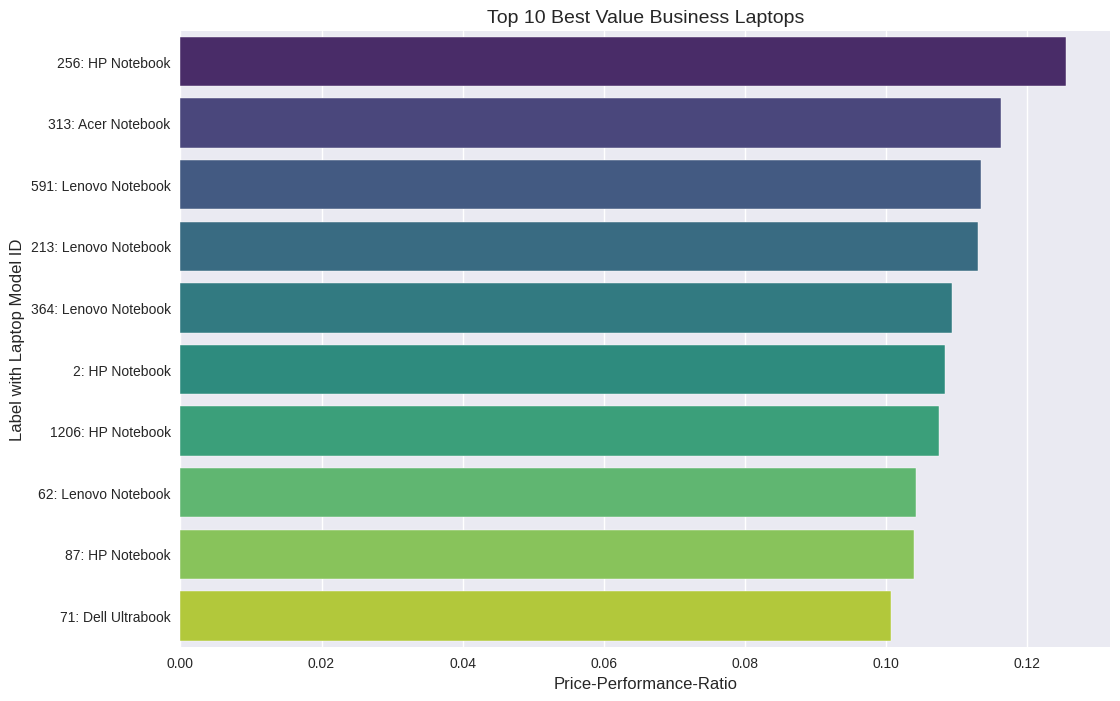

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Price_Performance_Ratio', y='Label', data=top_ten, palette='viridis', errorbar=None)
plt.title('Top 10 Best Value Business Laptops', fontsize=14)
plt.xlabel('Price-Performance-Ratio', fontsize=12)
plt.ylabel('Label with Laptop Model ID', fontsize=12)
plt.show()

Now, we create bar graph shown above. We can see that our max score 0.12, which is low but comparing from the .describe() in Section 4.1. We can see general idea with this, next will be the best part about the project.

# **6. Machine Learning: Split, Fit, Train, Predict, Result**

Now, this is the best part of this data science. Experimenting around creating machine learning model. As you can tell, we will split into 5 Steps, however, it's more of 3 Main Steps and 5 Substeps. First, we start by preparing data for train. The model we will use is Random Forest Regressor, we will explain such reason in 6.2

## **6.1 Machine Learning: Final Preprocessing and Split for train**

First of all, we already have show our data above, that will be refer back to step 6 during our testing data and predict to compare with the metric. However, to have our model good, it needs to fast, efficient, and easy to learn. To have reference data to cross check between train and test, we will split here but also to make one-hot-encoding as well for program to have easier time to train with.

In [ ]:
categorical_features = ['Company', 'TypeName', 'OpSys', 'Cpu_Brand']
machine_learn_df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("One-Hot Encoding properly implement! Ready to Train")

One-Hot Encoding properly implement! Ready to Train


we call .get_dummies() function to do process call One-Hot-Encoding, this usually results with model possibly easier to train, less mismatch, and potentially increase the model's performance, this works well with Random Forest Regressor because it will learn the group instead finding the relationship of this comparing to other metrics we provide.

Now, we split the features and data to x and y being our price point.

In [ ]:
x = machine_learn_df.drop('Price', axis=1) # We drop our "Label"
y = machine_learn_df['Price'] # Give this value a Tag

Now we assigned each variable we will now split data. Usually it's recommend to split between 75-80% to train and 20-25% to test. We will use 80/20 split for this dataset.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Split Data to train: {x_train.shape} and test: {x_test.shape}")

Split Data to train: (1018, 44) and test: (255, 44)


As we can see that we have 1018 data for train and 255 for test. Now, we complete the first part out of three of Model Training and Prediction. Next, is Fit and Train data

## **6.2 Machine Learning: Fit and Train Model**

Our next step is to use our train data, fit into the model to learn about the pattern and we provide the labels as our price to know with this kind of specification, what can we expect from the price of the laptop. We will also use this to compare with our price-to-performance ratio to be our target.

In [ ]:
rfr_model = RandomForestRegressor(n_estimators=200, random_state=5, n_jobs=1)
rfr_model.fit(x_train, y_train)
print("Model Ready to Use!")

Model Ready to Use!


As we can see we give model some hyperparameter, and this is what it means:
- n_estimator - number of decision trees to constructed with the forest regression.
- random_state - random seed number for the setting of the model
- n_jobs - Controls CPU cores or "jobs" to run in parallel, crucial for fitting and predictions

Now, after we fit and train our model. The next step is to evaluate the model.

## **6.3 Evaluation**

Next step is very crucial, we will new predict the price of the laptop given we have this specification. We will get the prediction of the price first then we comparing with our two metric here. R-Squared method and Mean Absolute Error or MAE in short.

This evaluates two different thing: How good price label brings out the actual data and average error between predicted price and the actual price.

Let's see what we got for the model evaluation below


In [ ]:
y_pred = rfr_model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(y_pred[:5])
print("\n--- Model Evaluation ---")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

[64811.64018571 79466.56025    38180.96167143 26891.9081
 30835.52065   ]

--- Model Evaluation ---
R-squared (R²) Score: 0.8513
Mean Absolute Error (MAE): 8485.50


Now, we got our result in, the score that we got from our testing and using the unseen data, our model got to 85% accuracy with the use of R² model, which is very good because it can generalize each variation of the laptop well and can correlate with the information we provide. For the MAE, the 8485.50 is the difference between actual and predicted price. Now, after this we can do our final step.

# **7. Post-Prediction -> Price-To-Performance Ratio**

Now, for our final step to our program, we will now use the similar tactic as before where we find the price-to-performance but now we will use our predicted price to give out the score, since we want to compare actual to the prediction that our model did create with

In [ ]:
results_df = df.loc[x_test.index].copy()
results_df['Predicted_Price'] = y_pred.round(2) # Model's prediction
results_df['Actual_Price'] = y_test # Actual Price

Here, we have our table, one will be price the model predict and the actual one from y_test variable that we store with.

In [ ]:
results_df['Cpu_Score'] = results_df.apply(lambda x: categorize_cpu(row['Cpu_Brand'], row['Cpu_Speed_GHz']), axis=1)
results_df['Storage_Score'] = (results_df['SSD'] * 3) + (results_df['Flash_Storage'] * 2) + (results_df['Hybrid'] * 1.5) + results_df['HDD']

for col in ['Cpu_Score', 'Storage_Score', 'Ram', 'Weight']:
  max_val = results_df[col].max()
  if max_val > 0:
    results_df[f'{col}_Norm'] = results_df[col] / results_df[col].max()
  else:
    results_df[f'{col}_Norm'] = 0
results_df['Performance_Score'] = (results_df['Cpu_Score_Norm'] * 0.4) + (results_df['Storage_Score_Norm'] * 0.35) + (results_df['Ram_Norm'] * 0.25) - (results_df['Weight_Norm'] * 0.015)


Now, we run the same metric as before for our new table containing the predictions and actual pricing based on our test data set.

In [ ]:
results_df['Predicted_Ratio'] = (results_df['Performance_Score']) / results_df['Predicted_Price'] * 10000
results_df['Actual_Ratio'] = (results_df['Performance_Score']) / results_df['Actual_Price'] * 10000

Finally, we get the actual price-to-performance ratio to use for comparison. Then, we will use this test dataset to now display the information of the actual and predicted price of the laptop

,Actual_Price,Predicted_Price,Performance_Score,Actual_Ratio,Predicted_Ratio
44,53226.72,64811.64,0.583069,0.109544,0.089964
1188,58554.72,79466.56,0.534227,0.091236,0.067227
133,30476.16,38180.96,0.492268,0.161526,0.128930
1262,24455.52,26891.91,0.537834,0.219923,0.199998
1222,28185.12,30835.52,0.538531,0.191069,0.174646


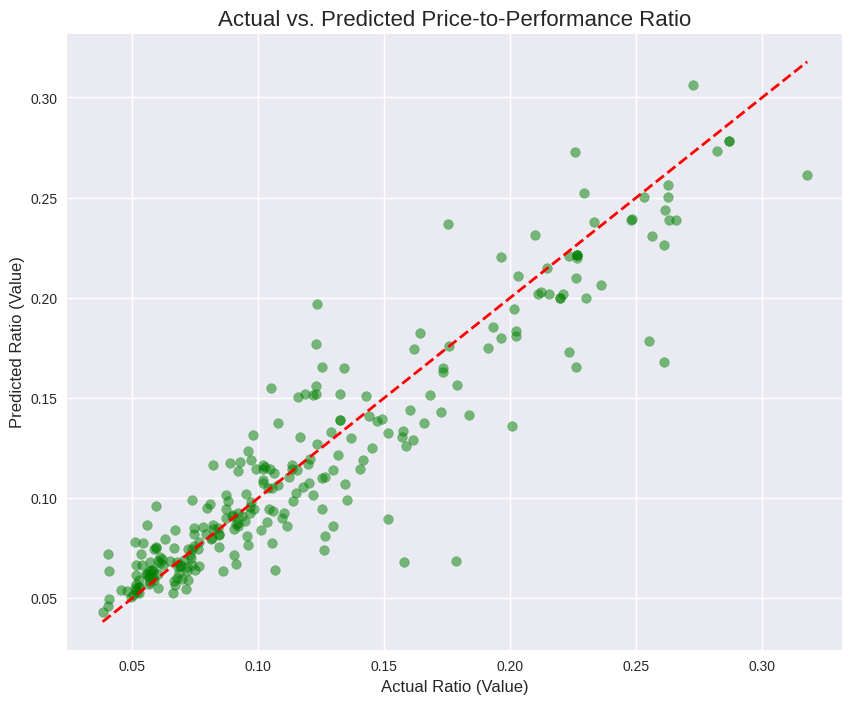

In [ ]:
display(results_df[[
    'Actual_Price',
    'Predicted_Price',
    'Performance_Score',
    'Actual_Ratio',
    'Predicted_Ratio'
]].head())

# 5. Visualize the comparison of the ratios
plt.figure(figsize=(10, 8))
plt.scatter(results_df['Actual_Ratio'], results_df['Predicted_Ratio'], alpha=0.5, color='green')
min_val = min(results_df['Actual_Ratio'].min(), results_df['Predicted_Ratio'].min())
max_val = max(results_df['Actual_Ratio'].max(), results_df['Predicted_Ratio'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.title('Actual vs. Predicted Price-to-Performance Ratio', fontsize=16)
plt.xlabel('Actual Ratio (Value)', fontsize=12)
plt.ylabel('Predicted Ratio (Value)', fontsize=12)
plt.show()

Now, with this visualization we can conclude our experiment that our AI model is accurate, has good generalization, and can be use to predicting laptop price given specification.


If we give a new laptop data with similar structure, it will able to perform well with good acccuracy and reflects real world as well without major discrepency and is proven using MAE and R² score.
